# Data prep

In [3]:
#some tensorflow updates 
import tensorflow as tf
tf.config.optimizer.set_jit(True)
from tensorflow.keras import mixed_precision  # NEW (TF 2.17)
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [5]:
#importing dataset
import os
path = "/Users/adi/Documents/University/YEAR 4/FYP thesis/Panonut360/dataset/"

In [7]:
import pandas as pd
import os

def load_all_data(base_dir):
    # Define an empty list to collect data from each CSV file
    all_data = []
    
    # Loop through each video directory
    for video_id in range(1, 2):
        video_dir = os.path.join(base_dir, f"video_{video_id}")
        
        # Loop through each user's CSV file 
        for user_id in range(1, 6):  
            file_path = os.path.join(video_dir, f"user{user_id}.csv")

        
            
            # Check if the file exists to avoid errors
            if os.path.isfile(file_path):

                df = pd.read_csv(file_path)

                df['video_ID'] = video_id
                df['user_ID'] = user_id
                
                # Ensure PlayerTime column has the correct format by trimming whitespace
                df['player_time'] = df['player_time'].str.strip()
                
                # Convert PlayerTime to datetime format
                try:
                    df['player_time'] = pd.to_timedelta(df['player_time'])
                    # df['player_time'] = pd.to_datetime(df['player_time'], format='%H:%M:%S.%f').dt.time
                except ValueError as e:
                    print(f"Error parsing time in file {file_path}: {e}")
                    continue  # Skip this file if there’s an error

                # Calculate elapsed time
                df['Elapsed_Time'] = (df['player_time'] - df['player_time'].iloc[0]).dt.total_seconds()
                
                
                # Append the processed DataFrame to the list
                all_data.append(df)
    
    # Concatenate all data into a single DataFrame
    consolidated_df = pd.concat(all_data, ignore_index=True)
    
    return consolidated_df


In [9]:
consolidated_data = load_all_data(path)

In [11]:
consolidated_data['user_ID'].unique()

array([1, 2, 3, 4, 5])

In [79]:
consolidated_data[:]

,player_time,frame,head_x,head_y,head_z,eye_c_x,eye_c_y,eye_c_z,eye_x_t,eye_y_t,...,head_quaternion_x,head_quaternion_y,head_quaternion_z,eye_quaternion_w,eye_quaternion_x,eye_quaternion_y,eye_quaternion_z,video_ID,user_ID,Elapsed_Time
0,0 days 00:00:00.069000,1,0.562121,0.106191,-0.820210,-0.018967,-0.054092,0.998352,0.572221,0.059916,...,0.004193,0.953985,0.056950,0.300383,-0.009007,0.953348,0.028586,1,1,0.000
1,0 days 00:00:00.071000,1,0.562121,0.106191,-0.820210,-0.002487,-0.054611,0.998489,0.572221,0.059916,...,0.004193,0.953985,0.056950,0.300383,-0.009007,0.953348,0.028586,1,1,0.002
2,0 days 00:00:00.082000,1,0.562121,0.106191,-0.820210,0.006058,-0.058624,0.998260,0.572221,0.059916,...,0.004193,0.953985,0.056950,0.300383,-0.009007,0.953348,0.028586,1,1,0.013
3,0 days 00:00:00.098000,1,0.562121,0.106191,-0.820210,0.007675,-0.060761,0.998108,0.572221,0.059916,...,0.004193,0.953985,0.056950,0.300383,-0.009007,0.953348,0.028586,1,1,0.029
4,0 days 00:00:00.116000,1,0.562121,0.106191,-0.820210,0.018433,-0.051208,0.998505,0.572221,0.059916,...,0.004193,0.953985,0.056950,0.300383,-0.009007,0.953348,0.028586,1,1,0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153032,0 days 00:04:53.206000,8795,-0.619297,0.320542,-0.716746,-0.015884,-0.300446,0.953659,-0.661740,0.006240,...,0.100766,0.920988,0.135612,-0.353751,0.001104,0.935335,0.002918,1,5,293.187
153033,0 days 00:04:53.216000,8795,-0.626262,0.309628,-0.715491,-0.010254,-0.306839,0.951691,-0.667809,0.009439,...,0.098409,0.920902,0.130288,-0.357556,0.001687,0.933880,0.004407,1,5,293.197
153034,0 days 00:04:53.225000,8795,-0.626262,0.309628,-0.715491,0.010864,-0.306793,0.951706,-0.667809,0.009439,...,0.098409,0.920902,0.130288,-0.357556,0.001687,0.933880,0.004407,1,5,293.206
153035,0 days 00:04:53.235000,8796,-0.633639,0.297851,-0.713993,0.053894,-0.305161,0.950760,-0.692522,-0.007192,...,0.096154,0.920734,0.124455,-0.373244,-0.001342,0.927726,-0.003336,1,5,293.216


# LSTM model 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Reshape  # Import Reshape layer



# Ensure frame numbers are not normalized
features = ['head_pitch', 'head_yaw', 'head_roll', 'eye_x_t', 'eye_y_t', 'eye_z_t']

# Create a copy of the frame column for tracking
df = consolidated_data[:]
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

df['frame'] = consolidated_data['frame']

# Group data by user
grouped_by_user = df.groupby('user_ID')

# Separate users into training and testing (80% train, 20% test)
user_ids = df['user_ID'].unique()
np.random.shuffle(user_ids)
train_users, test_users = train_test_split(user_ids, test_size=0.2, random_state=50)

# Create separate datasets for training and testing
train_data = df[df['user_ID'].isin(train_users)]
test_data = df[df['user_ID'].isin(test_users)]

sequence_length = 6  
n_frames_ahead = 12 



def create_sequences_with_multiple_targets(df, features, frame_column, sequence_length, n_frames_ahead):
    X, y, frames = [], [], []
    for i in range(len(df) - sequence_length - n_frames_ahead + 1):
        X.append(df[features].iloc[i:i + sequence_length].values)
        y.append(df[features].iloc[i + sequence_length:i + sequence_length + n_frames_ahead].values)
        frames.append(df[frame_column].iloc[i + sequence_length:i + sequence_length + n_frames_ahead].values)
    return np.array(X), np.array(y), np.array(frames)


grouped_train = train_data.groupby('user_ID')

X_train, y_train, frame_train = [], [], []
for user_id, user_data in grouped_train:
    X_user, y_user, frames_user = create_sequences_with_multiple_targets(
        user_data, features, 'frame', sequence_length, n_frames_ahead
    )
    X_train.append(X_user)
    y_train.append(y_user)
    frame_train.append(frames_user)

# Group test_data by user_ID
grouped_test = test_data.groupby('user_ID')

X_test, y_test, frame_test = [], [], []
for user_id, user_data in grouped_test:
    X_user, y_user, frames_user = create_sequences_with_multiple_targets(
        user_data, features, 'frame', sequence_length, n_frames_ahead
    )
    X_test.append(X_user)
    y_test.append(y_user)
    frame_test.append(frames_user)


X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
frame_train = np.concatenate(frame_train, axis=0)

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)
frame_test = np.concatenate(frame_test, axis=0)


X_train = X_train.reshape((X_train.shape[0], sequence_length, 1, len(features), 1))
X_test = X_test.reshape((X_test.shape[0], sequence_length, 1, len(features), 1))

# Build the ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=64, kernel_size=(1, 3), padding="same", return_sequences=True, 
               input_shape=(sequence_length, 1, len(features), 1)),
    Dropout(0.5),
    ConvLSTM2D(filters=32, kernel_size=(1, 3), padding="same", return_sequences=False),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(n_frames_ahead * len(features)),  
    Reshape((n_frames_ahead, len(features)))  # Ensure correct shape
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')




# Define checkpoint directory
# checkpoint_dir = "./checkpoints"
checkpoint_prefix = os.path.join("./checkpoints", "ckpt.weights.h5")

# Create checkpoint object to save model & optimizer state
checkpoint = tf.train.Checkpoint(optimizer=model.optimizer, model=model)

# Restore latest checkpoint 
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    print(f"Restoring from checkpoint: {latest_checkpoint}")
    checkpoint.restore(latest_checkpoint)
    print("Checkpoint restored, resuming training.")

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,  
    save_freq='epoch',  
    verbose=1
)



# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train, epochs=20, batch_size=1, validation_split=0.1,
    callbacks=[early_stopping, reduce_lr,checkpoint_callback]
)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict on the test set
predictions = model.predict(X_test)

predictions = predictions.reshape(-1, n_frames_ahead, len(features))
print(f"Original predictions shape: {predictions.shape}")
expected_rows = y_test.shape[0]
predictions = predictions[:expected_rows]  # Trim excess rows
print(f"Trimmed predictions shape: {predictions.shape}")

y_test_reshaped = y_test.reshape(-1, n_frames_ahead, len(features))


predictions = scaler.inverse_transform(predictions.reshape(-1, len(features)))
y_test_original = scaler.inverse_transform(y_test_reshaped.reshape(-1, len(features)))


Epoch 1/20


/Users/adi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109702/109704 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152
Epoch 1: saving model to ./checkpoints/ckpt.weights.h5
109704/109704 ━━━━━━━━━━━━━━━━━━━━ 683s 6ms/step - loss: 0.0152 - val_loss: 0.0095 - learning_rate: 0.0010
Epoch 2/20
109704/109704 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111
Epoch 2: saving model to ./checkpoints/ckpt.weights.h5
109704/109704 ━━━━━━━━━━━━━━━━━━━━ 661s 6ms/step - loss: 0.0111 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 3/20
 48078/109704 ━━━━━━━━━━━━━━━━━━━━ 8:26 8ms/step - loss: 0.0112

In [41]:
preds = pd.DataFrame({
    'frame' : frame_test.flatten(),
    'predicted_head_pitch': predictions[:, 0],
    'predicted_head_yaw': predictions[:, 1],
    'predicted_head_roll': predictions[:, 2],
    'predicted_eye_x_t': predictions[:, 3],
    'predicted_eye_y_t': predictions[:, 4],
    'predicted_eye_z_t': predictions[:, 5],
})
sorted_df = preds.sort_values(by=['frame'], ascending=True)
sorted_df[:]

,frame,predicted_head_pitch,predicted_head_yaw,predicted_head_roll,predicted_eye_x_t,predicted_eye_y_t,predicted_eye_z_t
0,2,345.25,228.125,6.148438,-0.677246,0.096802,-0.531738
14,3,346.00,229.875,4.039062,-0.690918,0.077393,-0.469238
13,3,345.50,229.875,6.148438,-0.684082,0.085876,-0.485107
12,3,345.00,229.000,6.148438,-0.684082,0.101624,-0.522461
25,3,345.50,230.500,6.148438,-0.684082,0.078613,-0.485107
...,...,...,...,...,...,...,...
259103,6163,352.50,289.750,7.554688,-0.758301,-0.186646,0.266357
259148,6163,353.00,287.500,8.429688,-0.799316,-0.191528,0.203125
259151,6164,352.50,288.500,7.378906,-0.762207,-0.185425,0.244873
259162,6164,352.25,288.500,6.851562,-0.751465,-0.186646,0.241455


In [43]:
orig = pd.DataFrame({
    'frame': frame_test.flatten(),
    'actual_head_pitch': y_test_original[:,0],
    'actual_head_yaw': y_test_original[:,1],
    'actual_head_roll': y_test_original[:,2],
    'actual_eye_x_t': y_test_original[:,3],
    'actual_eye_y_t': y_test_original[:,4],
    'actual_eye_z_t': y_test_original[:,5]
})
sorted_df2 = orig.sort_values(by=['frame'], ascending=True)
sorted_df2

,frame,actual_head_pitch,actual_head_yaw,actual_head_roll,actual_eye_x_t,actual_eye_y_t,actual_eye_z_t
0,2,348.2663,230.9411,8.143003,-0.850409,0.078846,-0.520160
14,3,348.5965,233.1445,7.655663,-0.837153,0.069672,-0.542495
13,3,348.4825,232.4104,7.827655,-0.833984,0.062865,-0.548172
12,3,348.3876,231.6740,7.992770,-0.850654,0.071854,-0.520780
25,3,348.5965,233.1445,7.655663,-0.837153,0.069672,-0.542495
...,...,...,...,...,...,...,...
259103,6163,356.0287,284.3372,3.448260,-0.968973,-0.189213,0.158972
259148,6163,356.0217,283.9865,3.452981,-0.969974,-0.189300,0.152627
259151,6164,356.0146,283.2687,3.491027,-0.971664,-0.190786,0.139474
259162,6164,356.0146,283.2687,3.491027,-0.971664,-0.190786,0.139474


In [45]:
from sklearn.metrics import r2_score
r_score = r2_score(sorted_df2,sorted_df)
print(r_score)
fit_accuracy = r_score * 100
print(f"Fit Accuracy (R² as percentage): {fit_accuracy:.2f}%")

0.8111242108330305
Fit Accuracy (R² as percentage): 81.11%


In [47]:
from sklearn.metrics import mean_squared_error
dense_mse1 = mean_squared_error(y_test_original[:], predictions[:])
print(f"Model MSE = {dense_mse1:.4f}")
import numpy as np 
MSE = np.square(np.subtract(y_test_original,predictions)).mean()
print(MSE)

Model MSE = 625.9301
625.930082399584


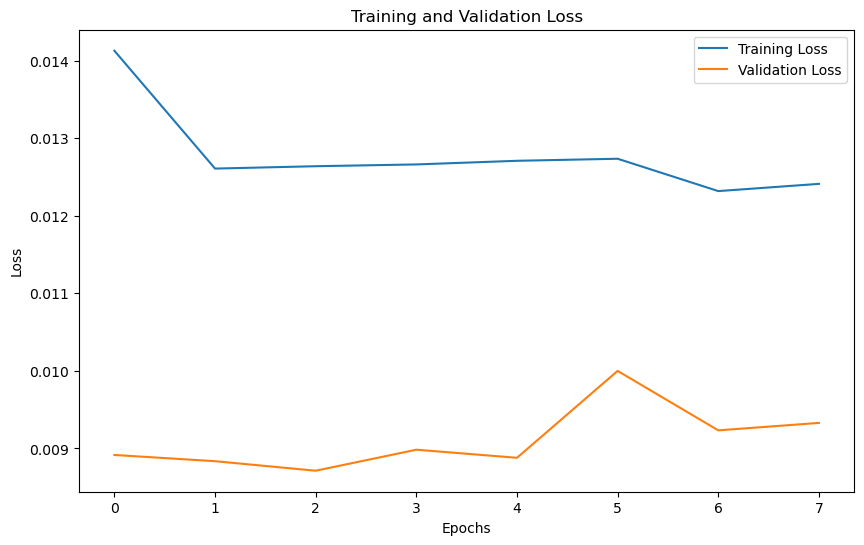

In [49]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Predicted Viewport Calculation

In [162]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 19.1 MB/s eta 0:00:0000:0100:01


In [57]:
import cv2
import numpy as np
import pandas as pd
from math import sin, cos, radians
import matplotlib.pyplot as plt
import seaborn as sns



def overlay_hevc_tiles(frame, video_width, video_height, N_x, N_y):

    tile_width = video_width // N_x
    tile_height = video_height // N_y

    # Draw horizontal lines
    for i in range(1, N_y):
        y = i * tile_height
        cv2.line(frame, (0, y), (video_width, y), (255, 0, 0), 2)  # Blue grid lines

    # Draw vertical lines
    for j in range(1, N_x):
        x = j * tile_width
        cv2.line(frame, (x, 0), (x, video_height), (255, 0, 0), 2)  # Blue grid lines

    # Add tile indices
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(N_y):
        for j in range(N_x):
            x = j * tile_width + 10
            y = i * tile_height + 30
            cv2.putText(frame, f"Tile {i},{j}", (x, y), font, 0.5, (0, 0, 255), 1)  # Red text

    return frame






def calculate_fov_trig(head_pitch, head_yaw, eye_direction, video_width, video_height, fov_width=90, fov_height=90):
    # Convert head_pitch and head_yaw from degrees to radians
    pitch_rad = radians(head_pitch)
    yaw_rad = radians(head_yaw)
    
    radius = 1.0

    # Convert spherical coordinates to Cartesian coordinates
    x = radius * cos(yaw_rad) * sin(pitch_rad)  # x-axis component
    y = radius * sin(yaw_rad) * sin(pitch_rad)  # y-axis component
    z = radius * cos(pitch_rad)                # z-axis component)               

    # Adjust for gaze direction by adding eye_direction (normalized vector)
    eye_x, eye_y, eye_z = eye_direction
    gaze_x = x + eye_x
    gaze_y = y + eye_y
    gaze_z = z + eye_z

    # Normalize the gaze vector to prevent scaling issues
    # norm = np.sqrt(gaze_x**2 + gaze_y**2 + gaze_z**2)
    # gaze_x /= norm
    # gaze_y /= norm
    # gaze_z /= norm

    # Map normalized Cartesian coordinates to 2D video plane
    center_x = int(video_width / 2 + gaze_x * video_width / 2)
    center_y = int(video_height / 2 - gaze_y * video_height / 2)

    fov_width_px = int((fov_width / 360) * video_width)
    fov_height_px = int((fov_height / 180) * video_height)

    # Define FOV rectangle 
    top_left = (max(0, center_x - fov_width_px // 2), max(0, center_y - fov_height_px // 2))
    bottom_right = (min(video_width, center_x + fov_width_px // 2), min(video_height, center_y + fov_height_px // 2))

    return top_left, bottom_right


def process_video_fov(video_path, frame_number, predictions_df,  actual_df, video_width, video_height,N_x, N_y):

    # Get predictions for the specified frame
    pred_row = predictions_df[predictions_df['frame'] == frame_number]
    if pred_row.empty:
        raise ValueError(f"No predictions found for frame {frame_number}.")
    
    head_pitch_pred = pred_row['predicted_head_pitch'].values[0]
    head_yaw_pred = pred_row['predicted_head_yaw'].values[0]
    eye_direction_pred = (
        pred_row['predicted_eye_x_t'].values[0],
        pred_row['predicted_eye_y_t'].values[0],
        pred_row['predicted_eye_z_t'].values[0]
    )

    # Get actual data for the specified frame
    actual_row = actual_df[actual_df['frame'] == frame_number]
    if actual_row.empty:
        raise ValueError(f"No actual data found for frame {frame_number}.")
    
    head_pitch_actual = actual_row['actual_head_pitch'].values[0]
    head_yaw_actual = actual_row['actual_head_yaw'].values[0]
    eye_direction_actual = (
        actual_row['actual_eye_x_t'].values[0],
        actual_row['actual_eye_y_t'].values[0],
        actual_row['actual_eye_z_t'].values[0]
    )

    # Calculate the optimal FOV for predicted and actual data
    fov_coordinates_pred = calculate_fov_trig(
        head_pitch_pred, head_yaw_pred, eye_direction_pred, video_width, video_height
    )
    fov_coordinates_actual = calculate_fov_trig(
        head_pitch_actual, head_yaw_actual, eye_direction_actual, video_width, video_height
    )

    # Overlay FOVs on the frame
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if not ret:
        raise ValueError(f"Frame {frame_number} could not be read from video.")
    cap.release()



    frame_with_tiles = overlay_hevc_tiles(frame, video_width, video_height, N_x, N_y)


    top_left_pred, bottom_right_pred = fov_coordinates_pred
    overlay = frame.copy()
    cv2.rectangle(overlay, top_left_pred, bottom_right_pred, (0, 255, 0), -1)  # Green for predicted


    top_left_actual, bottom_right_actual = fov_coordinates_actual
    cv2.rectangle(overlay, top_left_actual, bottom_right_actual, (0, 0, 255), -1)  # Red for actual
    
    alpha = 0.35
    frame_with_fov = cv2.addWeighted(overlay, alpha, frame, 1-alpha,0)

    # Add frame number to the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(
        frame_with_fov, 
        f"Frame: {frame_number} data: 10 users", 
        (10, 30), 
        font, 
        1, 
        (0, 255, 0), 
        2
    )

    return fov_coordinates_pred, fov_coordinates_actual, frame_with_fov



video_path = '/Users/adi/Documents/University/YEAR 4/FYP thesis/videos/Surfing.mp4'
frame_number = 3522
video_width = 4319
video_height = 1920



N_x = 6  # Number of horizontal tiles
N_y = 5  # Number of vertical tiles

# Predictions and actual data DataFrames
predictions_df = sorted_df
actual_df = sorted_df2

# Process the video and compute FOVs
fov_predicted, fov_actual, frame_with_both_fovs = process_video_fov(video_path, frame_number, predictions_df, actual_df, video_width, video_height,
                                                                   N_x, N_y)



# Save the frame with both FOVs overlaid
output_frame_path = 'frame_with_fov_testing_hevc_3.jpg'
cv2.imwrite(output_frame_path, frame_with_both_fovs)

# Print the FOVs in Cartesian coordinates
print("Predicted FOV Coordinates (Cartesian):", fov_predicted)
print("Actual FOV Coordinates (Cartesian):", fov_actual)




Predicted FOV Coordinates (Cartesian): ((0, 261), (954, 1221))
Actual FOV Coordinates (Cartesian): ((0, 453), (630, 1413))


## Tile overlap Metric 


Average Tile Overlap Ratio: 77.22%


/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


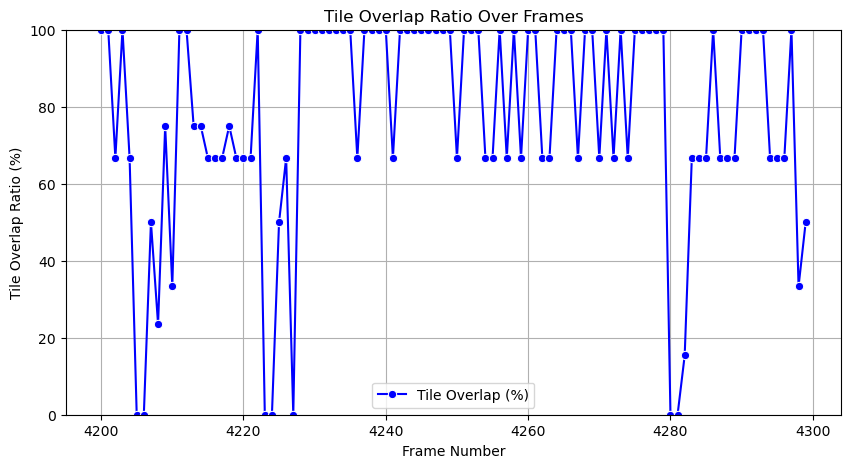

/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


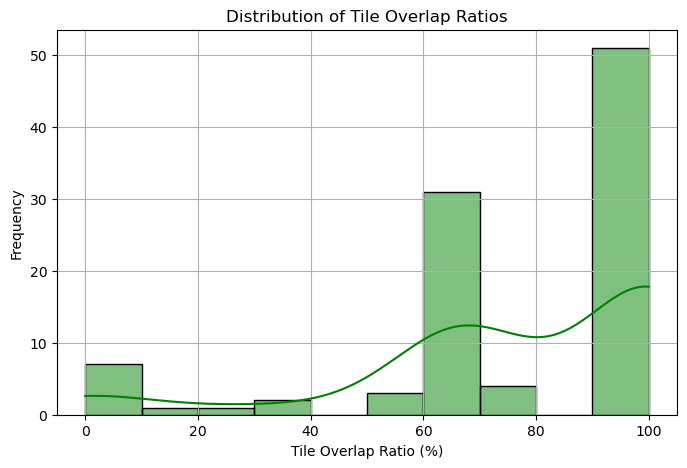

In [59]:
frame_range = list(range(4200,4300))

def plot_tile_overlap(df_results, save_path="tile_overlap_plot.png"):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df_results["Frame"], y=df_results["Tile Overlap Ratio (%)"], marker="o", color="b", label="Tile Overlap (%)")
    
    plt.xlabel("Frame Number")
    plt.ylabel("Tile Overlap Ratio (%)")
    plt.title("Tile Overlap Ratio Over Frames")
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(True)
    
    # Save the plot
    plt.savefig(save_path)
    plt.show()


def plot_tile_overlap_distribution(df_results, save_path="tile_overlap_histogram.png"):

    plt.figure(figsize=(8, 5))
    sns.histplot(df_results["Tile Overlap Ratio (%)"], bins=10, kde=True, color="green")
    
    plt.xlabel("Tile Overlap Ratio (%)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Tile Overlap Ratios")
    plt.grid(True)
    
    # Save the histogram
    plt.savefig(save_path)
    plt.show()
def calculate_tile_overlap(fov_pred, fov_actual, video_width, video_height, N_x, N_y):
    tile_width = video_width // N_x
    tile_height = video_height // N_y

    def get_tiles_in_fov(fov_coords):
        """Returns a set of tile indices covered by the given FOV coordinates."""
        (x1, y1), (x2, y2) = fov_coords
        tile_x1, tile_y1 = x1 // tile_width, y1 // tile_height
        tile_x2, tile_y2 = x2 // tile_width, y2 // tile_height
        
        covered_tiles = set()
        for i in range(tile_y1, min(tile_y2 + 1, N_y)):
            for j in range(tile_x1, min(tile_x2 + 1, N_x)):
                covered_tiles.add((i, j))  # Store as (row, column)
        return covered_tiles

    # Get tile sets for predicted and actual FOV
    tiles_pred = get_tiles_in_fov(fov_pred)
    tiles_actual = get_tiles_in_fov(fov_actual)

    # Calculate tile overlap ratio
    intersection = tiles_pred & tiles_actual
    union = tiles_pred | tiles_actual

    overlap_ratio = len(intersection) / len(union) if len(union) > 0 else 0
    return overlap_ratio * 100  # Convert to percentage

def process_video_tile_overlap(video_path, frame_range, predictions_df, actual_df, video_width, video_height, N_x, N_y):
    results = []

    for frame_number in frame_range:
        try:
            # Compute FOVs for predicted and actual data
            fov_pred, fov_actual, _ = process_video_fov(
                video_path, frame_number, predictions_df, actual_df, video_width, video_height, N_x, N_y
            )

            # Calculate tile overlap ratio
            tile_overlap_ratio = calculate_tile_overlap(fov_pred, fov_actual, video_width, video_height, N_x, N_y)
            
            # Store the result
            results.append({"Frame": frame_number, "Tile Overlap Ratio (%)": tile_overlap_ratio})

        except ValueError as e:
            print(f"Skipping frame {frame_number}: {e}")

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)

    # Compute average overlap ratio
    avg_overlap_ratio = df_results["Tile Overlap Ratio (%)"].mean()
    
    return df_results, avg_overlap_ratio

# Process tile overlap for a range of frames
df_overlap_results, avg_tile_overlap = process_video_tile_overlap(
    video_path, frame_range, predictions_df, actual_df, video_width, video_height, N_x, N_y
)
print(f"\nAverage Tile Overlap Ratio: {avg_tile_overlap:.2f}%")

plot_tile_overlap(df_overlap_results)
plot_tile_overlap_distribution(df_overlap_results)


In [54]:
df_overlap_results

,Frame,Tile Overlap Ratio (%)
0,4200,100.000000
1,4201,100.000000
2,4202,100.000000
3,4203,75.000000
4,4204,100.000000
...,...,...
95,4295,27.272727
96,4296,100.000000
97,4297,100.000000
98,4298,100.000000


In [159]:
#result = sorted_df[sorted_df['frame'] == 4468]
result[:10]

# Output video code

In [153]:
import os
path ='/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/output_pics'
os.makedirs(path, exist_ok=True)
#generate frame pics
for i in range(4200,4251):
    frame_number = i
    fov_predicted, fov_actual, frame_with_both_fovs = process_video_fov(video_path, frame_number, predictions_df, actual_df, video_width, video_height,
                                                                   N_x, N_y)
    output_frame_path = os.path.join(path, f'frame{i}_hevc.jpg')
    cv2.imwrite(output_frame_path, frame_with_both_fovs)
print("Done")

Done


In [155]:
#recreate video
image_files = sorted([f for f in os.listdir(path) if f.endswith(".jpg")], key=lambda x: int(x.split("_")[0][5:]))
first_frame = cv2.imread(os.path.join(path, image_files[0]))
height, width, layers = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
fps = 30
video_writer = cv2.VideoWriter("final_edit_30fpsv2.mp4", fourcc, fps, (width, height))
for img_file in image_files:
    frame = cv2.imread(os.path.join(path, img_file))
    video_writer.write(frame)
video_writer.release()
print("done")

done


## tile change LSTM model construction code

In [497]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Load the original POV data
features = ['head_pitch', 'head_yaw', 'head_roll', 'eye_x_t', 'eye_y_t', 'eye_z_t']
pov_data = consolidated_data[:] # Ensure correct file path
pov_data = consolidated_data[features]

# Convert Timedelta columns to total seconds (or another numerical format)
for col in pov_data.select_dtypes(include=['timedelta64']).columns:
    pov_data[col] = pov_data[col].dt.total_seconds()
pov_data = pov_data.apply(pd.to_numeric, errors='coerce')  
pov_data = pov_data.fillna(0) 



def generate_tile_change_labels(pov_data, history=6, horizon=12, threshold=0.7):
    labels = []
    for i in range(len(pov_data) - history - horizon):
        current_tiles = pov_data.iloc[i : i + history].values  # History window
        future_tiles = pov_data.iloc[i + history : i + history + horizon].values  # Horizon window
        
        # Compute mean absolute difference
        diff = np.abs(future_tiles.mean(axis=0) - current_tiles.mean(axis=0))
        
        # Assign label 1 if change is above threshold in any feature
        tile_change = int(np.any(diff > threshold))
        labels.append(tile_change)

    return np.array(labels)



# Generate labels for the new dataset
tile_change_labels = generate_tile_change_labels(pov_data)
unique, counts = np.unique(tile_change_labels, return_counts=True)
print(dict(zip(unique, counts)))


X = []
y = tile_change_labels

for i in range(len(pov_data) - 6 - 12):
    X.append(pov_data.iloc[i : i + 6].values)  # Extract history frames as input
X = np.array(X)

# Train-test split (same as baseline model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# LSTM model for classification
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(6, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}




# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, class_weight=class_weight_dict)

# Evaluate the split model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  

test_indices = pov_data.index[-len(X_test):] 
test_frames = pov_data.iloc[test_indices] 
pred_label = test_frames.copy() 
pred_label["label"] = y_pred

# Reset index for clarity
pred_label.reset_index(drop=True, inplace=True)



{0: 55686, 1: 49166}
Epoch 1/20


/Users/adi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4194/4194 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6136 - loss: 0.6504 - val_accuracy: 0.6321 - val_loss: 0.6320
Epoch 2/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6345 - loss: 0.6303 - val_accuracy: 0.6423 - val_loss: 0.6281
Epoch 3/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6394 - loss: 0.6282 - val_accuracy: 0.6449 - val_loss: 0.6243
Epoch 4/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6421 - loss: 0.6228 - val_accuracy: 0.6475 - val_loss: 0.6205
Epoch 5/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6464 - loss: 0.6190 - val_accuracy: 0.6436 - val_loss: 0.6177
Epoch 6/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6489 - loss: 0.6176 - val_accuracy: 0.6430 - val_loss: 0.6134
Epoch 7/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6497 - loss: 0.6149 - val_accuracy: 0.6526 - val_loss: 0.6170
Epoch 8/20
4194/4194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6498 - loss: 0.6152 - val_accurac

In [509]:
pred_label

,head_pitch,head_yaw,head_roll,eye_x_t,eye_y_t,eye_z_t,label
0,350.6407,90.70148,358.8402,0.982216,0.059028,-0.178148,0
1,350.6358,90.66735,358.8325,0.983036,0.058584,-0.173790,0
2,350.6417,90.64565,358.8437,0.983007,0.058302,-0.174013,0
3,350.6408,90.63541,358.8527,0.982863,0.058375,-0.174768,1
4,350.6384,90.61579,358.8669,0.982802,0.058722,-0.174996,1
...,...,...,...,...,...,...,...
20966,358.0585,69.80067,354.2032,0.955197,0.048032,0.292025,1
20967,357.8974,70.16177,354.1220,0.953073,0.050034,0.298546,0
20968,357.7591,70.53739,354.0175,0.956384,0.057336,0.286404,0
20969,357.7591,70.53739,354.0175,0.956384,0.057336,0.286404,1


In [376]:
features = ['frame','head_pitch', 'head_yaw', 'head_roll', 'eye_x_t', 'eye_y_t', 'eye_z_t','label']
pred_label = pred_label[features] 
pred_label[:30]

,frame,head_pitch,head_yaw,head_roll,eye_x_t,eye_y_t,eye_z_t,label
0,330,5.960219,77.63574,359.3927,0.984599,-0.052988,0.166589,1
1,331,5.973762,77.62042,359.3663,0.985105,-0.061991,0.160361,1
2,331,5.973762,77.62042,359.3663,0.985105,-0.061991,0.160361,1
3,331,5.971264,77.58273,359.3265,0.985818,-0.056682,0.157940,1
4,332,5.969882,77.54636,359.3063,0.986045,-0.057546,0.156163,1
5,332,5.976411,77.53482,359.3001,0.986599,-0.063723,0.150170,1
6,332,5.962708,77.50042,359.2853,0.986725,-0.062868,0.149729,1
7,333,5.950930,77.48215,359.2829,0.986865,-0.062031,0.149137,1
8,333,5.955197,77.45560,359.2644,0.986821,-0.061822,0.149457,1
9,333,5.955197,77.45560,359.2644,0.986821,-0.061822,0.149457,1


In [499]:
baseline_pov_predictions = predictions  # Assuming baseline model exists

def detect_baseline_tile_change(baseline_pov_predictions, history=6, horizon=12, threshold=1.5):
  
    baseline_tile_change_pred = []
    
    for i in range(len(baseline_pov_predictions) - history - horizon):  
        current_tiles = baseline_pov_predictions[i : i + history]  # History window
        future_tiles = baseline_pov_predictions[i + history : i + history + horizon]  # Horizon window

        # Compute mean absolute difference
        diff = np.abs(future_tiles.mean(axis=0) - current_tiles.mean(axis=0))
        
        # Apply same threshold as split model
        tile_change = int(np.any(diff > threshold))
        baseline_tile_change_pred.append(tile_change)

    return np.array(baseline_tile_change_pred)

# Apply function to baseline model predictions
baseline_tile_change_pred = detect_baseline_tile_change(baseline_pov_predictions, threshold=1.6)


# Get indices where y_test has tile changes
tile_change_indices = np.where(y_test == 1)[0]


y_test_filtered = y_test[tile_change_indices]
baseline_pred_filtered = np.array(baseline_tile_change_pred)[tile_change_indices]
split_pred_filtered = np.array(y_pred)[tile_change_indices]

# Ensure lengths match
assert len(y_test_filtered) == len(baseline_pred_filtered) == len(split_pred_filtered), "Mismatch in comparison lengths!"


print(f"Total samples: {len(y_test)}")
print(f"Filtered samples (tile changes only): {len(y_test_filtered)}")


# Compute accuracy for baseline model
baseline_accuracy = accuracy_score(y_test_filtered, baseline_pred_filtered)
print(f"Baseline Model Accuracy (tile change subset): {baseline_accuracy:.4f}")

# Compute accuracy for split model
split_accuracy = accuracy_score(y_test_filtered, split_pred_filtered)
print(f"Split Model Accuracy (tile change subset): {split_accuracy:.4f}")


Baseline Model Accuracy (tile change subset): 0.5002
Split Model Accuracy (tile change subset): 0.6224


In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error


features = ['head_pitch', 'head_yaw', 'head_roll', 'eye_x_t', 'eye_y_t', 'eye_z_t']

pov_data = consolidated_data[features]

# HEVC Tiling Config
N_x, N_y = 6, 5  # 6x5 tiling configuration



def calculate_fov_tiles(head_pitch, head_yaw, eye_direction, video_width, video_height, N_x=6, N_y=5):

    top_left, bottom_right = calculate_fov_trig(
        head_pitch, head_yaw, eye_direction, video_width, video_height
    )
    return fov_to_tiles(top_left, bottom_right, video_width, video_height, N_x, N_y)

def fov_to_tiles(top_left, bottom_right, video_width, video_height, N_x=6, N_y=5):

    tile_width = video_width // N_x
    tile_height = video_height // N_y

    start_x, start_y = top_left
    end_x, end_y = bottom_right

    tile_x_start = start_x // tile_width
    tile_y_start = start_y // tile_height
    tile_x_end = min(N_x - 1, end_x // tile_width)
    tile_y_end = min(N_y - 1, end_y // tile_height)

    tiles_in_fov = [(row, col) for row in range(tile_y_start, tile_y_end + 1)
                                 for col in range(tile_x_start, tile_x_end + 1)]
    return tiles_in_fov

def generate_tile_change_labels(pov_data, video_width, video_height, history=6, horizon=12, threshold=0.7):
 
    labels = []
    for i in range(len(pov_data) - history - horizon):
        current_tiles = set(calculate_fov_tiles(
            pov_data.iloc[i]['head_pitch'], pov_data.iloc[i]['head_yaw'],
            (pov_data.iloc[i]['eye_x_t'], pov_data.iloc[i]['eye_y_t'], pov_data.iloc[i]['eye_z_t']),
            video_width, video_height, N_x, N_y
        ))
        future_tiles = set(calculate_fov_tiles(
            pov_data.iloc[i + history]['head_pitch'], pov_data.iloc[i + history]['head_yaw'],
            (pov_data.iloc[i + history]['eye_x_t'], pov_data.iloc[i + history]['eye_y_t'], pov_data.iloc[i + history]['eye_z_t']),
            video_width, video_height, N_x, N_y
        ))
        tile_change = int(len(future_tiles.difference(current_tiles)) > threshold)
        labels.append(tile_change)
    return np.array(labels)

def detect_baseline_tile_change(baseline_pov_predictions, video_width, video_height, history=6, horizon=12, threshold=0.7):
 
    baseline_tile_change_pred = []
    for i in range(len(baseline_pov_predictions) - history - horizon):  
        current_tiles = set(calculate_fov_tiles(
            baseline_pov_predictions[i][0], baseline_pov_predictions[i][1],
            (baseline_pov_predictions[i][3], baseline_pov_predictions[i][4], baseline_pov_predictions[i][5]),
            video_width, video_height, N_x, N_y
        ))
        future_tiles = set(calculate_fov_tiles(
            baseline_pov_predictions[i + history][0], baseline_pov_predictions[i + history][1],
            (baseline_pov_predictions[i + history][3], baseline_pov_predictions[i + history][4], baseline_pov_predictions[i + history][5]),
            video_width, video_height, N_x, N_y
        ))
        tile_change = int(len(future_tiles.difference(current_tiles)) > threshold)
        baseline_tile_change_pred.append(tile_change)
    return np.array(baseline_tile_change_pred)

# Generate labels for the new dataset
tile_change_labels = generate_tile_change_labels(pov_data, video_width=4319, video_height=1920)


X = []
y = tile_change_labels

for i in range(len(pov_data) - 6 - 12):
    X.append(pov_data.iloc[i : i + 6].values)  # Extract history frames as input
X = np.array(X)

# Train-test split (same as baseline model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM model for classification
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(6, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid') 
])


from sklearn.utils.class_weight import compute_class_weight

# Compute class weights to give more importance to tile changes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,class_weight=class_weight_dict)

# Evaluate the split model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


baseline_pov_predictions = predictions
baseline_tile_change_pred = detect_baseline_tile_change(baseline_pov_predictions, 4319, 1920)
tile_change_indices = np.where(y_test == 1)[0]  # Indices where tile changes occur

baseline_tile_change_pred = baseline_tile_change_pred[-len(y_test):]  # Trim to match y_test

# Filter predictions
baseline_pred_filtered = np.array(baseline_tile_change_pred)[tile_change_indices]
split_pred_filtered = np.array(y_pred)[tile_change_indices]
y_test_filtered = y_test[tile_change_indices]


print(f"Total samples: {len(y_test)}")
print(f"Filtered samples (tile changes only): {len(y_test_filtered)}")

unique, counts = np.unique(tile_change_labels, return_counts=True)
print(dict(zip(unique, counts)))



split_accuracy = accuracy_score(y_test_filtered, split_pred_filtered)
print(f"Split Model Tile Change Accuracy: {split_accuracy:.4f}")

baseline_accuracy = accuracy_score(y_test_filtered, baseline_pred_filtered)
print(f"Baseline Model Tile Change Accuracy: {baseline_accuracy:.4f}")



Epoch 1/20


/Users/adi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2097/2097 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5719 - loss: 0.6877 - val_accuracy: 0.5949 - val_loss: 0.6879
Epoch 2/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6013 - loss: 0.6808 - val_accuracy: 0.6022 - val_loss: 0.6797
Epoch 3/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5998 - loss: 0.6817 - val_accuracy: 0.6133 - val_loss: 0.6539
Epoch 4/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6002 - loss: 0.6819 - val_accuracy: 0.5714 - val_loss: 0.6940
Epoch 5/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5606 - loss: 0.6860 - val_accuracy: 0.4328 - val_loss: 0.7033
Epoch 6/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5788 - loss: 0.6747 - val_accuracy: 0.6079 - val_loss: 0.6837
Epoch 7/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5793 - loss: 0.6719 - val_accuracy: 0.6079 - val_loss: 0.6478
Epoch 8/20
2097/2097 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5956 - loss: 0.6613 - val_accurac

In [65]:
unique, counts = np.unique(baseline_pred_filtered, return_counts=True)
print(dict(zip(unique, counts)))


{0: 1988, 1: 1082}


In [67]:
unique, counts = np.unique(split_pred_filtered, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1790, 1: 1280}


In [272]:
predictions
p1 = pd.DataFrame({
    'head_pitch': predictions[:,0],
    'head_yaw': predictions[:,1],
    'head_roll': predictions[:,2],
    'eye_x_t': predictions[:,3],
    'eye_y_t': predictions[:,4],
    'eye_z_t': predictions[:,5]# Use the frame numbers from the test set
})
p1

,head_pitch,head_yaw,head_roll,eye_x_t,eye_y_t,eye_z_t
0,350.75,149.8750,0.521973,-1.082031,-0.970703,0.138306
1,350.75,149.0000,0.170288,-1.025391,-0.931152,0.095093
2,353.00,149.6250,0.258057,-0.969727,-0.877441,0.051880
3,349.00,150.5000,0.433838,-0.878906,-0.833984,0.011131
4,348.50,149.7500,-0.181274,-0.804199,-0.764648,-0.021286
...,...,...,...,...,...,...
265855,341.75,104.1250,11.773438,0.925781,0.061646,-0.292236
265856,340.75,104.3125,12.125000,0.916016,0.065308,-0.296387
265857,340.25,104.3125,13.382812,0.898926,0.061646,-0.301270
265858,340.25,104.3125,14.257812,0.889160,0.060425,-0.303955


In [260]:
pov_data

,head_pitch,head_yaw,head_roll,eye_x_t,eye_y_t,eye_z_t
0,347.4626,224.55800,9.019712,-0.809111,0.069957,-0.583463
1,347.6424,225.94870,8.861979,-0.818580,0.065643,-0.570616
2,347.7431,226.64960,8.772423,-0.821868,0.071093,-0.565211
3,347.9284,228.05390,8.593013,-0.836283,0.071461,-0.543616
4,348.0129,228.77740,8.486555,-0.840391,0.068689,-0.537590
...,...,...,...,...,...,...
104865,358.0585,69.80067,354.203200,0.955197,0.048032,0.292025
104866,357.8974,70.16177,354.122000,0.953073,0.050034,0.298546
104867,357.7591,70.53739,354.017500,0.956384,0.057336,0.286404
104868,357.7591,70.53739,354.017500,0.956384,0.057336,0.286404
